# Bengaluru House Price Prediction



In [ ]:
pwd

'/content'

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


 # Load the Dataset

In [ ]:
data=pd.read_csv(r'/content/sample_data/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape

(13320, 9)

# Exploratory Data Analysis(EDA)

In [ ]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
data.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458378,1.629936,96.857122
std,0.881128,0.780127,105.382490
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.755000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


In [ ]:
data.isnull().mean()*100

,0
area_type,0.0
availability,0.0
location,0.0
size,0.0
society,0.0
total_sqft,0.0
bath,0.0
balcony,0.0
price,0.0


In [ ]:
data['area_type'].value_counts()


,count
area_type,
Super built-up Area,6017
Built-up Area,1158
Plot Area,269
Carpet Area,52


In [ ]:
data.drop(columns=["availability","area_type","society","balcony"],axis=1,inplace=True)
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [ ]:
data.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0


In [ ]:
data.shape

(7496, 6)

# Feature Engineering

In [ ]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [ ]:
data['bhk']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [ ]:
data.drop(columns=['size'],axis=1,inplace=True)

In [ ]:
data.shape

(7496, 5)

In [ ]:
data.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [ ]:
# Exploring total_sqft feature
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [ ]:
data[data['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
3,Lingadheeranahalli,1521,3.0,95.00,3
5,Whitefield,1170,2.0,38.00,2
11,Whitefield,2785,5.0,295.00,4
12,7th Phase JP Nagar,1000,2.0,38.00,2
14,Sarjapur,2250,3.0,148.00,3
15,Mysore Road,1175,2.0,73.50,2
16,Bisuvanahalli,1180,3.0,48.00,3
17,Raja Rajeshwari Nagar,1540,3.0,60.00,3


In [ ]:
def convert_sqrt_into_number(x):
  token=x.split('-')
  if len(token)==2:
    return(float(token[0])==float(token[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df1=data.copy()
df1['total_sqft']=df1['total_sqft'].apply(convert_sqrt_into_number)
df1.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
3,Lingadheeranahalli,1521.0,3.0,95.00,3
5,Whitefield,1170.0,2.0,38.00,2
11,Whitefield,2785.0,5.0,295.00,4


In [ ]:
df2=df1.copy()

Here, we are adding a new features called Price per Square Feet

In [ ]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,2785.0,5.0,295.00,4,10592.459605


Here we are going to do Dimentionality Reduction for the data which are categorical varaible. We need to apply Dimentionality Reduction here to reduce the number of locations.

In [ ]:
df2.location=df2.location.apply(lambda x: x.strip())
location_stats=df2['location'].value_counts(ascending=False)
location_stats

,count
location,
Whitefield,398
Sarjapur Road,310
Electronic City,238
Kanakpura Road,216
Thanisandra,215
...,...
HAL 2nd Stage,1
Adarsh Nagar,1
S R Layout,1


In [ ]:
len(location_stats[location_stats<=10])

483

In [ ]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,
Jalahalli East,10
Mallasandra,10
Arekere,10
Amruthahalli,10
Rayasandra,10
...,...
HAL 2nd Stage,1
Adarsh Nagar,1
S R Layout,1


In [ ]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df2.location = df2.location.fillna('other')  # Replace missing values with 'other'
len(df2.location.unique())

144

In [ ]:
df2.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,2785.0,5.0,295.00,4,10592.459605


In [ ]:
df2[df2.total_sqft/df2.bhk<300].head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,location,total_sqft,bath,price,bhk,price_per_sqft
30,Yelahanka,0.0,4.0,186.000,4,inf
122,Hebbal,0.0,4.0,477.000,4,inf
137,8th Phase JP Nagar,0.0,2.0,54.005,2,inf
165,Sarjapur,0.0,2.0,43.490,2,inf
188,KR Puram,0.0,2.0,56.800,2,inf


In [ ]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(7310, 6)

In [ ]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7295.000000,7310.000000,7310.000000,7310.000000,7295.000000
mean,1509.676755,2.455951,97.162499,2.529822,5867.138052
std,931.172511,0.855660,105.825059,0.717145,2721.981370
min,350.000000,1.000000,10.000000,1.000000,371.428571
25%,1125.000000,2.000000,50.000000,2.000000,4281.334216
50%,1314.000000,2.000000,70.000000,2.000000,5339.554173
75%,1657.500000,3.000000,105.000000,3.000000,6711.409396
max,36000.000000,9.000000,2700.000000,11.000000,76530.612245


In [ ]:
def remove_outlier_from_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key, sub in df.groupby('location'):
        m = np.mean(sub.price_per_sqft)
        st = np.std(sub.price_per_sqft)
        replace_df = sub[(sub.price_per_sqft > (m - st)) & (sub.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, replace_df], ignore_index=True)
    return df_out

df4 = remove_outlier_from_price_per_sqft(df3)
print(df4.shape)


(5755, 6)


In [ ]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,7173.601148
3,1st Phase JP Nagar,1077.0,2.0,93.0,2,8635.097493
4,1st Phase JP Nagar,1590.0,3.0,131.0,3,8238.993711


# Ploting the **Scatter chart** for 2BHK and 3BHK properties

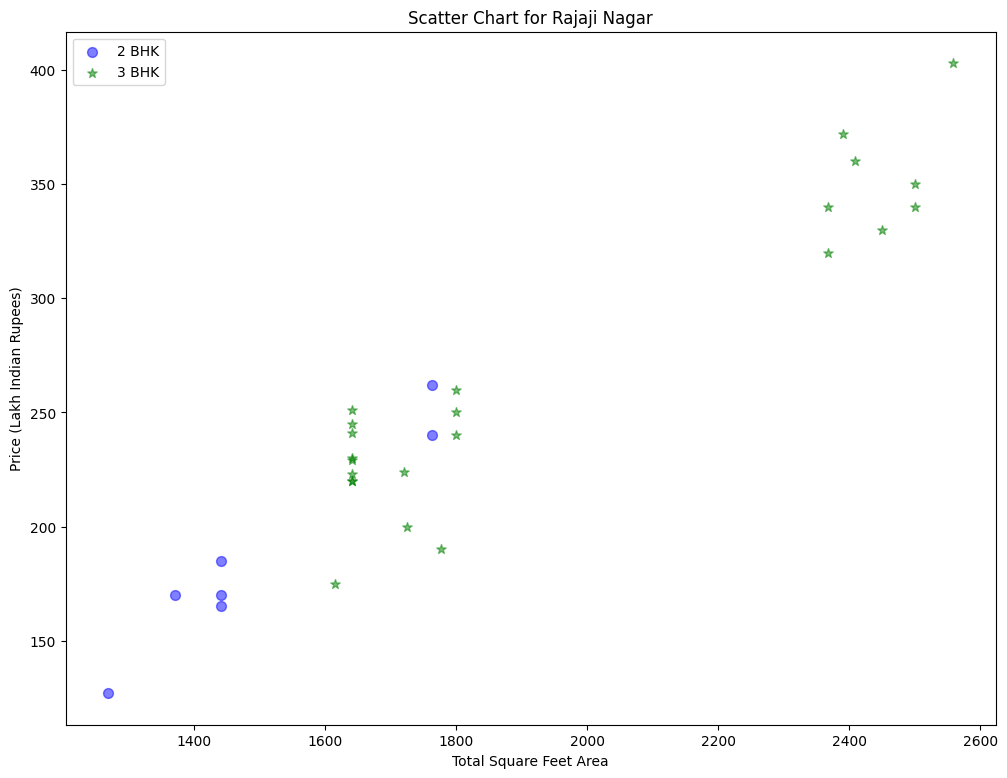

In [ ]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (12, 9)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', alpha=0.5, s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='*', color='green', label='3 BHK', alpha=0.5, s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(f"Scatter Chart for {location}")
    plt.legend()
    plt.show()

plot_scatter_chart(df4, "Rajaji Nagar")

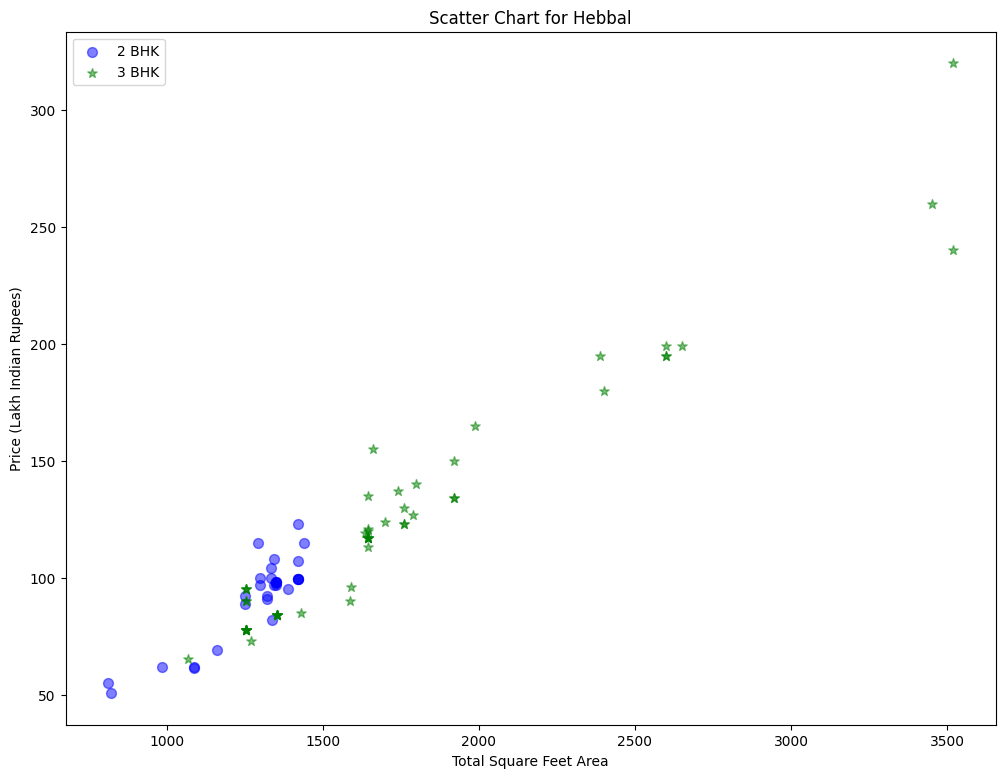

In [ ]:
plot_scatter_chart(df4,'Hebbal')

 # **Density plot**

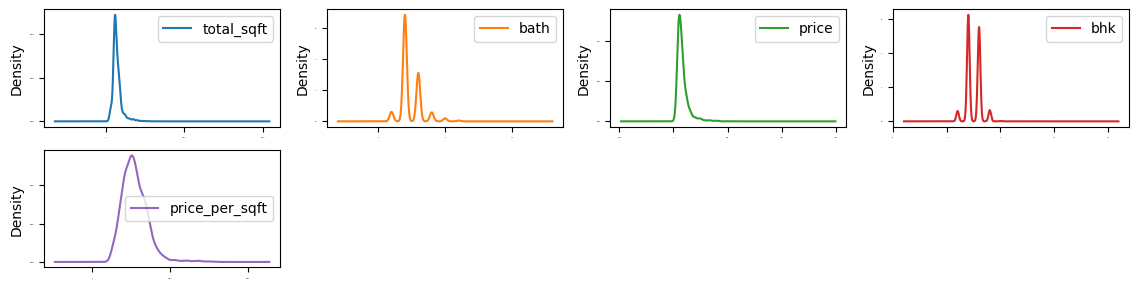

In [ ]:
df4.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=1, figsize=(14,7))
plt.show()

# **Histogram**

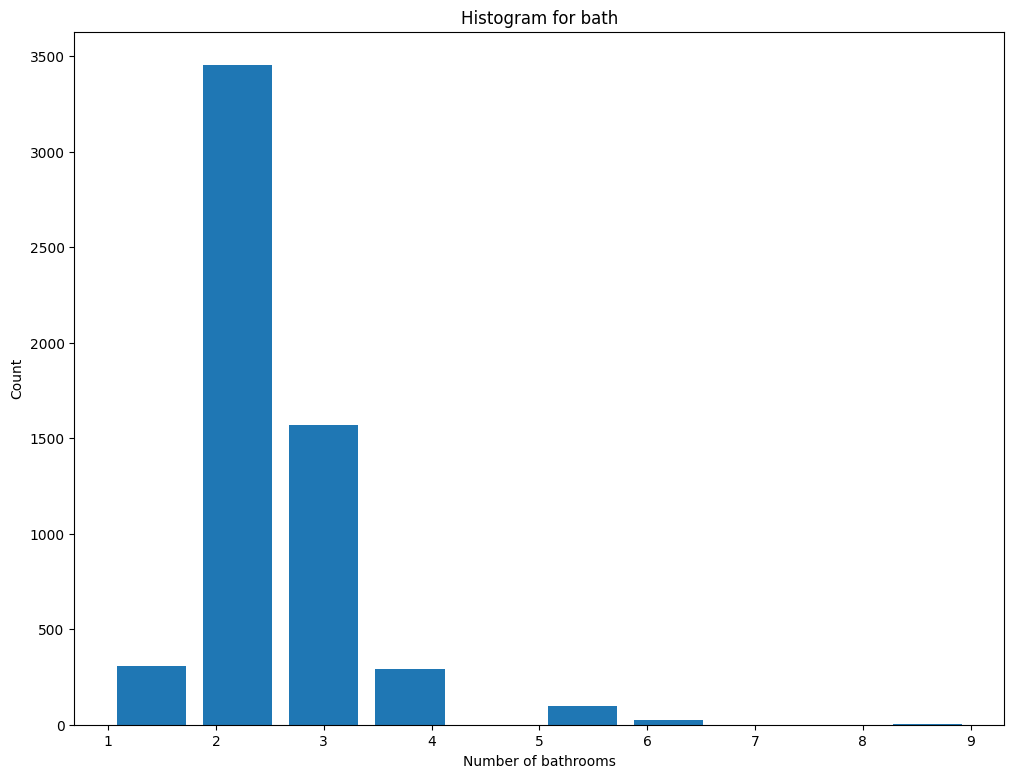

In [ ]:
# Ploting histogram for bath vs counts
plt.hist(df4.bath,rwidth=0.8)
plt.title("Histogram for bath")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

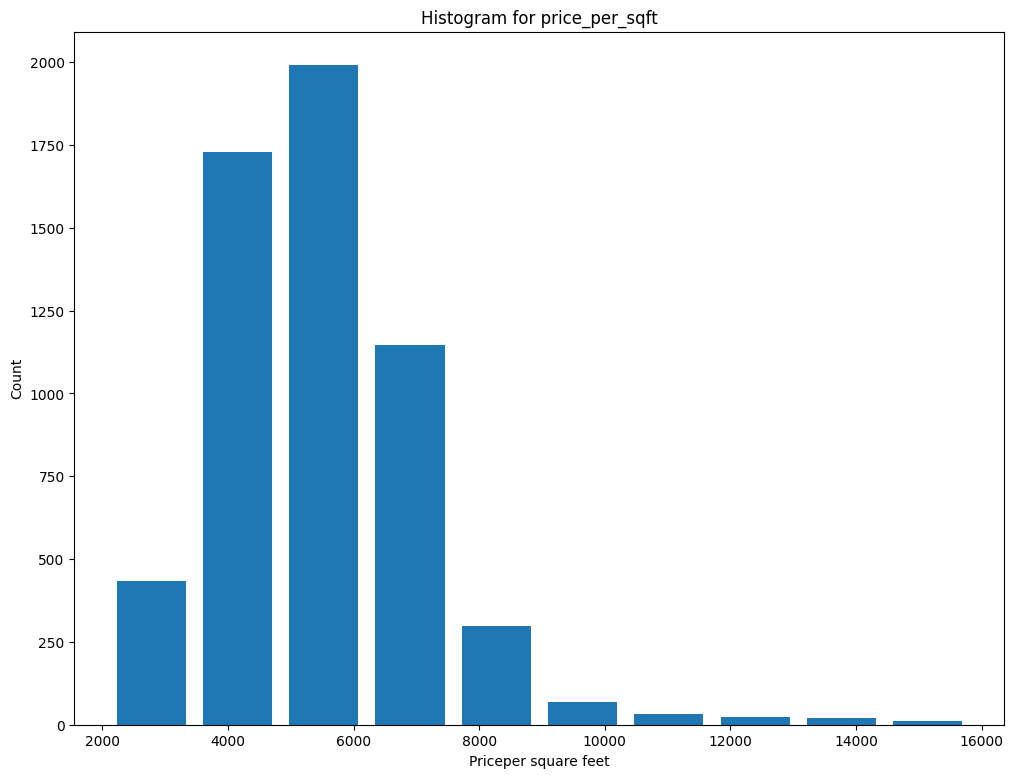

In [ ]:
# Ploting the histogram for Price per Square Feet vs Counts
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.title("Histogram for price_per_sqft")
plt.xlabel("Priceper square feet")
plt.ylabel("Count")
plt.show()

In [ ]:
df4.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

In [ ]:
df4[df4.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft


In [ ]:
df4[df4.bath>df4.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
3713,Thanisandra,1806.0,6.0,116.0,3,6423.034330
4767,other,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df4=df4[~(df4.bath>df4.bhk+2)]
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,7173.601148
3,1st Phase JP Nagar,1077.0,2.0,93.0,2,8635.097493
4,1st Phase JP Nagar,1590.0,3.0,131.0,3,8238.993711


In [ ]:
df4.shape

(5753, 5)

One hot encoding

In [ ]:
dummies=pd.get_dummies(df4.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df5=pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')
df5.head(3)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df5.drop('location',axis='columns',inplace=True)
df5.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1875.0,3.0,167.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1394.0,2.0,100.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1077.0,2.0,93.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1590.0,3.0,131.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df5.shape

(5753, 147)

In [ ]:
x=df5.drop('price',axis=1)
y=df5['price']

In [ ]:
x.shape

(5753, 146)

In [ ]:
y.shape

(5753,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=42)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5637, 146), (116, 146), (5637,), (116,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

lr = LinearRegression()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('lr', lr)])
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
print(score)


0.7430826009386227


In [ ]:
predictions = pipe.predict(X_test.head())
print(predictions)

[111.46630959  53.48687694  68.12190334 139.02894264  99.18914855]


In [ ]:
y_test

,price
1654,115.00
4764,38.00
2778,80.00
4215,139.00
3945,85.00
...,...
2945,73.00
4703,40.05
3558,70.00
3221,52.00


In [ ]:
def predict_price(location, sqft, bath, bhk):
    # Create a DataFrame with the input features
    X = pd.DataFrame({'Sqft': [sqft], 'Bath': [bath], 'BHK': [bhk]})
    # Add the one-hot encoded location to the DataFrame
    X = pd.concat([X, pd.get_dummies(pd.Series(location))], axis=1)
    # Select only the relevant columns
    X = X[['Sqft', 'Bath', 'BHK']]
    # Make predictions using the trained model
    return lr.predict(X)[0]

In [ ]:
predict_price('Indira Nagar',1400,2,3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


69298.28847676728

In [ ]:
predict_price('1st Phase JP Nagar',1875,3,3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


92794.45589247091